<div class="alert alert-success" style = color:#000080>
    <span style='font-family:Georgia' >
<h2> Telecom Churn Case study</h2>

<h4>You have a telecom firm which has collected data of all its customers. The main types of attributes are:</h4>

- **Demographics (age, gender etc.)**
- **Services availed (internet packs purchased, special offers taken etc.)**
- **Expenses (amount of recharge done per month etc.)**
 

**Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not.**</span>
</div>
        

<H1>There are three types of logistic regression models:</H1>

- <b>Binary logistic regression</b>
- <b>Multinomial logistic regression</b>
- <b>Ordinal logistic regression: </b>

<b>Methods for solving Binary Logistic Regression:</b>

1) `statsmodels.api.GLM`
   - families.Binomial(link=links.logit) (sigmoid function) (BY DEFAULT)
   - families.Binomial(link=links.probit) 
   - families.Binomial(link=links.cloglog)    
   
2) `sklearn.LogisticRegression`

3) `Gradient Descent Binary classification` 

        - (own made class)
        - sklearn, SGDClassifier
4) `Newtons method Binary classification`
         
         - (own made class)
         - sklearn, SGDClassifier
    

# statsmodels.api as sm.GLM

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install kds

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import ks_2samp # ks statistics
from kds.metrics import plot_cumulative_gain, plot_ks_statistic, report, plot_lift

In [7]:
churn = pd.read_csv("churn_data.csv")
customer = pd.read_csv("customer_data.csv")
internet = pd.read_csv("internet_data.csv")
dict_info = pd.read_csv("Telecom Churn Data Dictionary.csv", encoding= 'latin' , index_col = "S.No.")

In [8]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('float_format', '{:f}'.format)

In [9]:
dict_info

,Variable Name,Meaning
S.No.,,
1,CustomerID,The unique ID of each customer
2,Gender,The gender of a person
3,SeniorCitizen,Whether a customer can be classified as a senior citizen.
4,Partner,If a customer is married/ in a live-in relationship.
5,Dependents,If a customer has dependents (children/ retired parents)
6,Tenure,The time for which a customer has been using the service.
7,PhoneService,Whether a customer has a landline phone service along with the internet service.
8,MultipleLines,Whether a customer has multiple lines of internet connectivity.
9,InternetService,The type of internet services chosen by the customer.


In [10]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


In [11]:
churn.shape

(7043, 9)

In [12]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
customer.shape

(7043, 5)

In [14]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [15]:
internet.shape

(7043, 9)

In [16]:
telecom = pd.merge( customer, internet, how = 'inner' , on = 'customerID').merge(churn, how = 'inner' , on = 'customerID')

In [17]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


In [18]:
telecom.shape

(7043, 21)

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
categ_cols = []
other_cols = []

for i in telecom.columns:
    if telecom[i].nunique() <= 5:
        categ_cols.append(i)
    else:
        other_cols.append(i)
    
print(categ_cols)
print(len(categ_cols))
print(other_cols)
print(len(other_cols))
        

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
17
['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
4


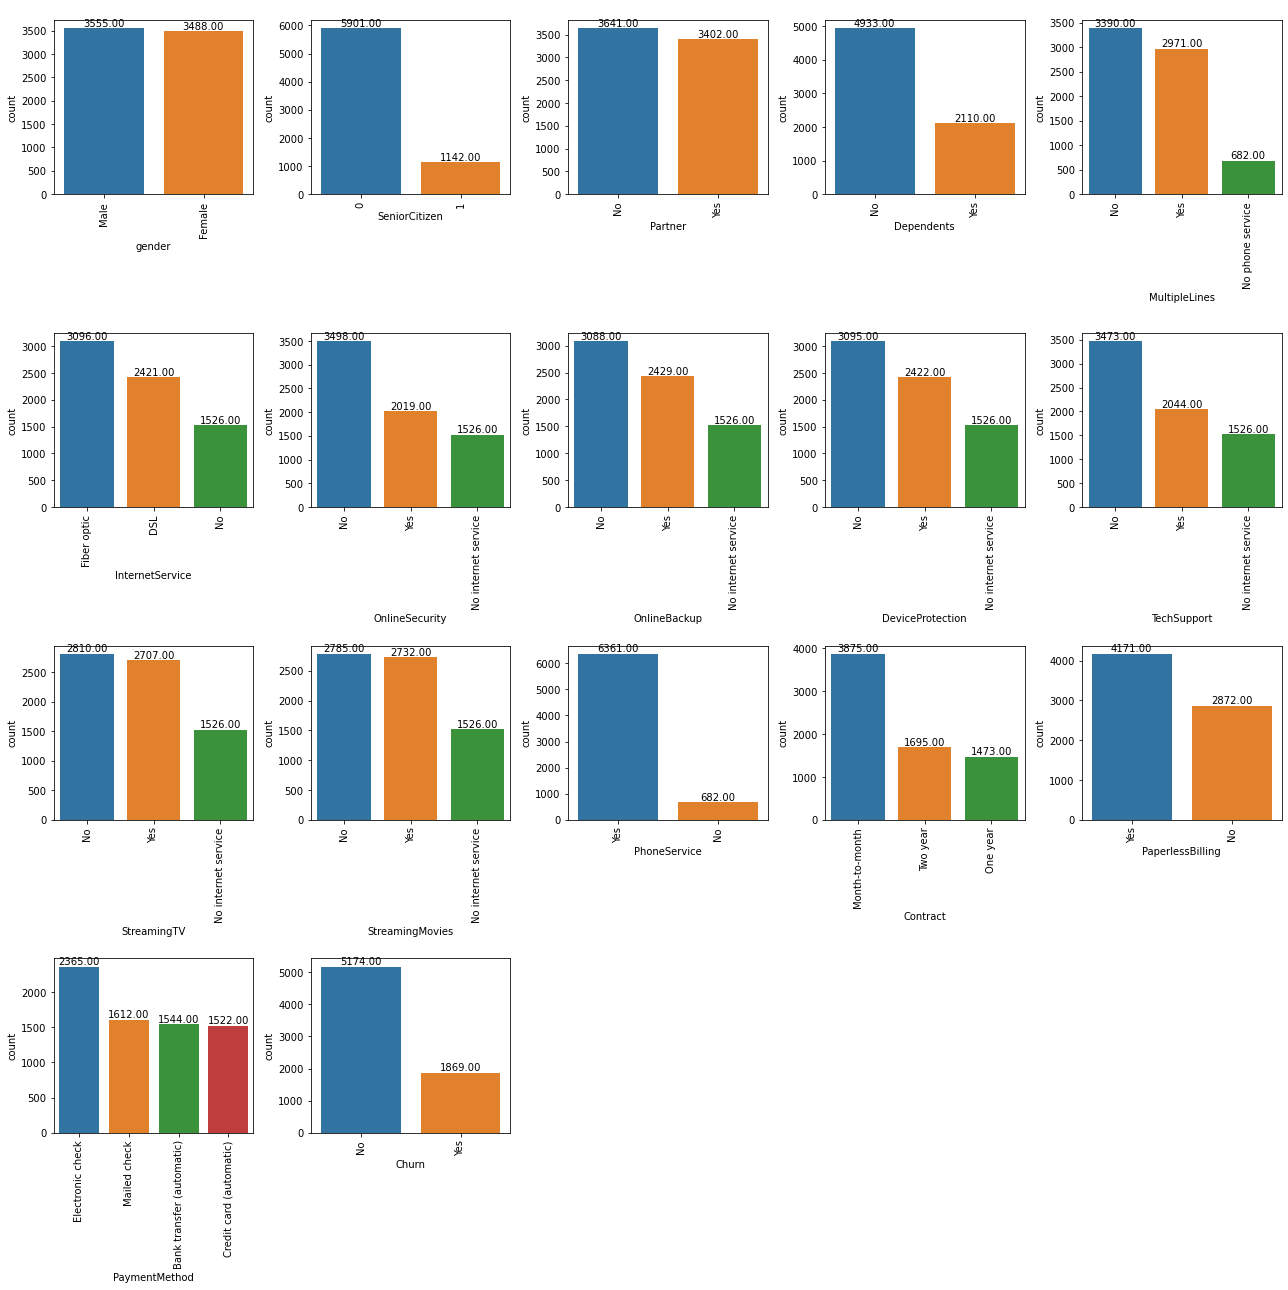

In [21]:
n_rows = 4
n_cols = 5

plt.figure(figsize = (18,18))
for i,j in enumerate(categ_cols[:]):
    plt.subplot(n_rows, n_cols,  i+1)
    ax = sns.countplot(telecom[j], order = telecom[j].value_counts().index)
    plt.bar_label(ax.containers[0], fmt='\n%.2f', label_type='edge')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [22]:
cols_2 = []
for i in telecom.columns:
    if telecom[i].nunique() == 2:
        print(i, telecom[i].unique())
        cols_2.append(i)

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


## Mapping : yes/no to 1/0

In [23]:
for i in cols_2[2:]:
    telecom[i] = telecom[i].map({ 'Yes': 1, 'No':0})

In [24]:
for i in telecom.columns:
    if telecom[i].nunique() == 2:
        print(i, telecom[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
PhoneService [0 1]
PaperlessBilling [1 0]
Churn [0 1]


## Creating dummy variables

In [25]:
dumm_cols1 = ['Contract', 'PaymentMethod','InternetService', 'gender']

dummy1 = pd.get_dummies(telecom[dumm_cols1], drop_first =  True)
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0


In [26]:
dumm_cols2 = []
for i in telecom.columns:
    if i not in dumm_cols1:
        if telecom[i].nunique() > 2 and  telecom[i].nunique() <5 :
            print(i, "\t\t", telecom[i].unique())
            dumm_cols2.append(i)


MultipleLines 		 ['No phone service' 'No' 'Yes']
OnlineSecurity 		 ['No' 'Yes' 'No internet service']
OnlineBackup 		 ['Yes' 'No' 'No internet service']
DeviceProtection 		 ['No' 'Yes' 'No internet service']
TechSupport 		 ['No' 'Yes' 'No internet service']
StreamingTV 		 ['No' 'Yes' 'No internet service']
StreamingMovies 		 ['No' 'Yes' 'No internet service']


### convert 'No internet service' to 'NIS'

In [27]:
for i in dumm_cols2:
    telecom[i] = telecom[i].map({'No internet service':'NIS', 'Yes':"Yes", "No": "No"})

In [28]:
for i in telecom.columns:
    if i not in dumm_cols1:
        if telecom[i].nunique() > 2 and  telecom[i].nunique() <5 :
            print(i, telecom[i].unique())


OnlineSecurity ['No' 'Yes' 'NIS']
OnlineBackup ['Yes' 'No' 'NIS']
DeviceProtection ['No' 'Yes' 'NIS']
TechSupport ['No' 'Yes' 'NIS']
StreamingTV ['No' 'Yes' 'NIS']
StreamingMovies ['No' 'Yes' 'NIS']


In [29]:
dumm_cols2

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [30]:
dummy2 = pd.get_dummies(telecom[dumm_cols2], drop_first =  True)
dummy2.head()

,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,1,0,1,0,1,0,1,0,1,0,1,0


In [31]:
cols_drop = dumm_cols2 + dumm_cols1
cols_drop

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'InternetService',
 'gender']

In [32]:
aa= pd.concat([telecom,dummy1,dummy2], axis=1)
aa.shape

(7043, 42)

In [33]:
aa.drop(cols_drop, axis = 1, inplace = True)

In [34]:
aa.shape

(7043, 31)

In [35]:
aa.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.850000,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.950000,1889.5,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.850000,108.15,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.300000,1840.75,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.700000,151.65,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [36]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [37]:
(aa["TotalCharges"] == ' ').sum()

11

In [38]:
tc =  aa["TotalCharges"][aa["TotalCharges"] != ' ']
tc

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
30      6766.95
31       181.65
32      1874.45
33         20.2
34        45.25
35       7251.7
36        316.9
37       3548.3
38      3549.25
39       1105.4
40        475.7
41      4872.35
42       418.25
43      4861.45
44       981.45
45       3906.7
46           97
47       144.15
48       4217.8
49       4254.1
50      3838.75
51       1426.4
52      1752.65
53        633.3
54      4456.35
55      1752.55
56       6311.2
57      7076.35
58        894.3
59       7853.7
60       4707.1
61       5450.7
62      

In [39]:
tc = tc.astype("float")

In [40]:
tc.describe()

count   7032.000000
mean    2283.300441
std     2266.771362
min       18.800000
25%      401.450000
50%     1397.475000
75%     3794.737500
max     8684.800000
Name: TotalCharges, dtype: float64

In [41]:
aa[aa["TotalCharges"] == ' ']

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
488,4472-LVYGI,0,1,1,0,0,1,52.550000,,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0
753,3115-CZMZD,0,0,1,0,1,0,20.250000,,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,1,0,1,0,80.850000,,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1
1082,4367-NUYAO,0,1,1,0,1,0,25.750000,,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,1,1,0,0,0,56.050000,,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0
3331,7644-OMVMY,0,1,1,0,1,0,19.850000,,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,1,0,1,0,25.350000,,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,1,0,1,0,20.000000,,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,0,1,1,19.700000,,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,1,0,1,0,73.350000,,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0


In [42]:
# there tenure are zero hence no value is there. convert all those values to 0.

In [43]:
aa["TotalCharges"][aa["TotalCharges"] == ' '] = 0

In [44]:
aa["TotalCharges"] = aa["TotalCharges"].astype("float")

In [45]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [46]:
final =  aa.copy()

In [47]:
final.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.850000,29.850000,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.950000,1889.500000,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.850000,108.150000,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.300000,1840.750000,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.700000,151.650000,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


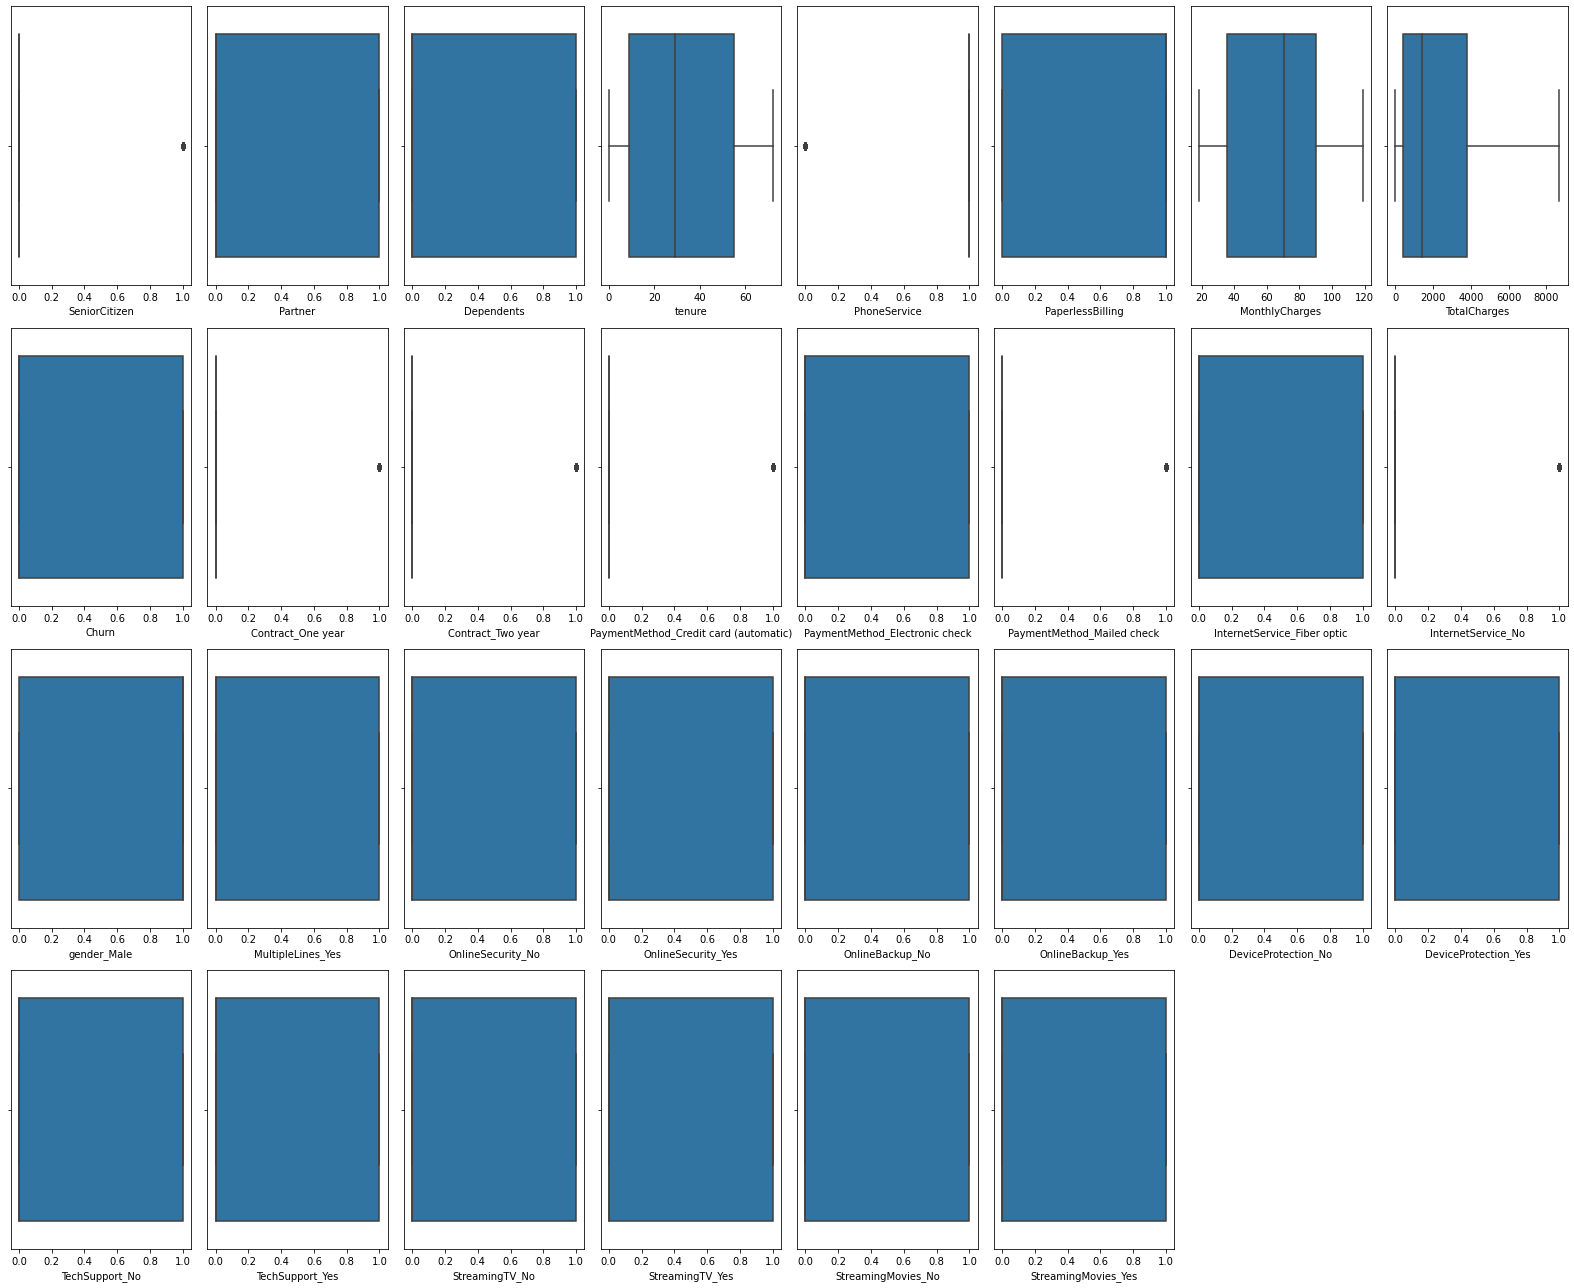

In [48]:
n_rows = 4
n_cols = 8

plt.figure(figsize = (22,18))
for i,j in enumerate(final.columns[1:]):
    plt.subplot(n_rows, n_cols,  i+1)
    ax = sns.boxplot(final[j], orient = 'v')
    
plt.tight_layout()
plt.show()

In [49]:
categ = ['SeniorCitizen',
       'PhoneService',  'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'InternetService_No', ]
len(categ)

7

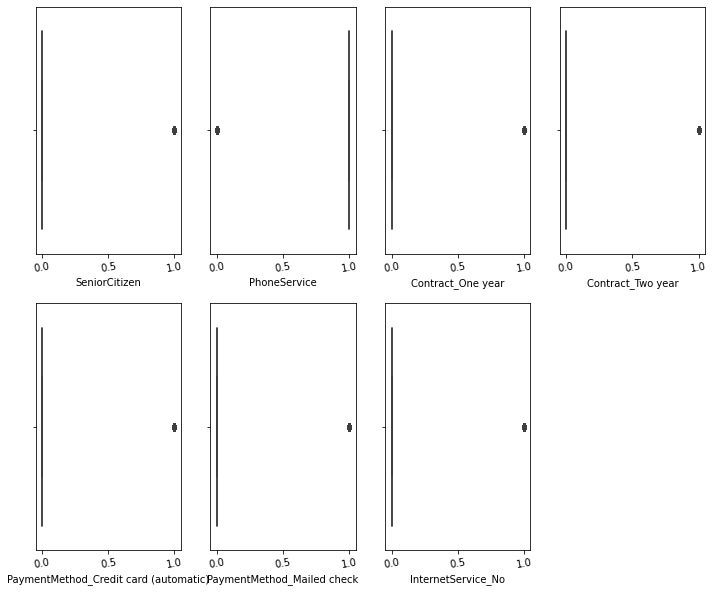

In [50]:
n_rows = 2
n_cols = 4

plt.figure(figsize = (12,10))
for i,j in enumerate(categ):
    plt.subplot(n_rows, n_cols,  i+1)
    ax = sns.boxplot(final[j], orient = 'v')
    plt.xticks(rotation = 10)
plt.show()

In [51]:
final.drop("customerID", axis =  1, inplace = True)

In [52]:
final.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.209144,0.240664,0.216101,0.335794,0.228880,0.439585,0.216669,0.504756,0.421837,0.496663,0.286668,0.438450,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.406726,0.427517,0.411613,0.472301,0.420141,0.496372,0.412004,0.500013,0.493888,0.500024,0.452237,0.496232,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


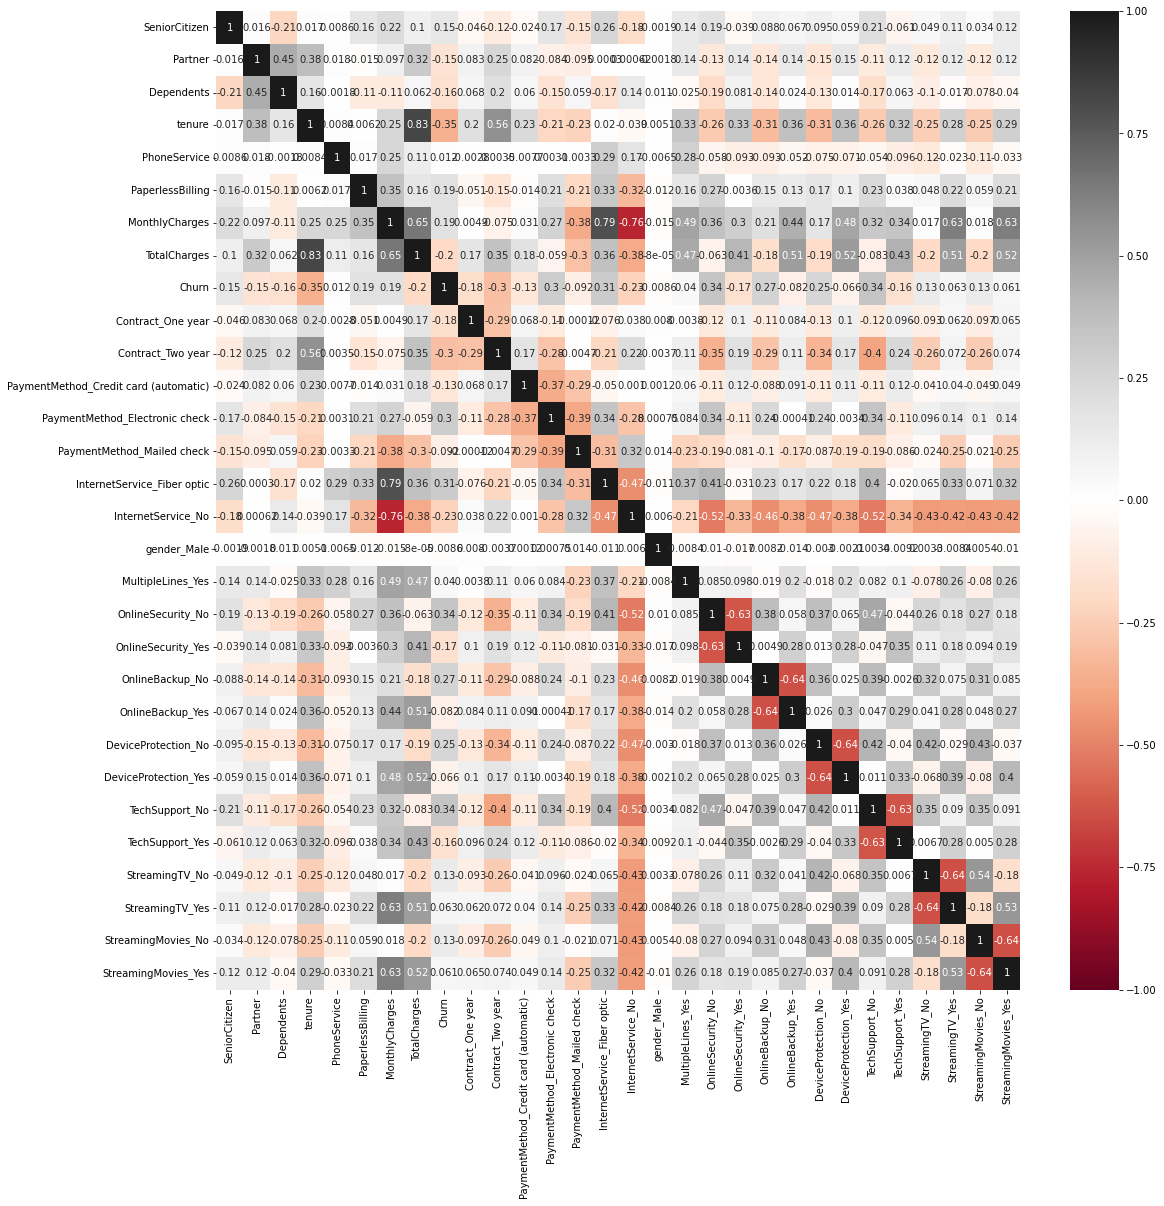

In [53]:
plt.figure(figsize = (18,18))
sns.heatmap(final.corr(), annot = True, cmap = "RdGy",  vmin = -1, vmax =1)
plt.show()

In [54]:
def vif(X_train):    
    vif_df = pd.DataFrame()
    vif_df["column_name"] = X_train.columns
    vif_df["vif_values"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df.sort_values(by = "vif_values", ascending = False, inplace  = True)
    vif_df.reset_index( drop=True, inplace= True)
    return vif_df

In [55]:
df_train, df_test = train_test_split(final, train_size = .70, test_size = .30, random_state =  100)

In [56]:
df_train.shape

(4930, 30)

In [57]:
df_test.shape

(2113, 30)

In [58]:
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0,0,1,51,0,0,60.150000,3077.000000,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
5792,1,0,0,15,1,1,96.300000,1426.750000,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1
5334,0,1,1,49,1,1,107.950000,5293.200000,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
878,0,0,0,60,1,0,64.750000,4039.500000,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
6578,0,0,1,10,1,0,73.550000,693.300000,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1


In [59]:
from sklearn.preprocessing import StandardScaler

# Selecting features using RFE
from sklearn.feature_selection import RFE

In [60]:
scaler = StandardScaler()


num_vars = ["tenure", "MonthlyCharges","TotalCharges"]
Train_scaler = scaler.fit(df_train[num_vars])

df_train[num_vars] = Train_scaler.transform(df_train[num_vars])
df_test[num_vars] = Train_scaler.transform(df_test[num_vars])

In [61]:
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0,0,1,0.754422,0,0,-0.145568,0.350963,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
5792,1,0,0,-0.710751,1,1,1.051796,-0.377957,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1
5334,0,1,1,0.673024,1,1,1.437668,1.329866,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
878,0,0,0,1.120716,1,0,0.006794,0.776103,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
6578,0,0,1,-0.914247,1,0,0.298268,-0.701925,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1


In [62]:
df_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
4880,0,1,0,0.713723,1,0,-1.457203,-0.536573,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,1.609107,1,0,-1.480388,-0.374711,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1289,0,0,0,1.242814,1,0,0.140938,0.807839,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0
5745,0,1,1,1.161415,1,1,-1.336307,-0.369808,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4873,0,0,0,-1.036345,1,0,-1.498605,-0.944133,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train = df_train.drop("Churn", axis = 1)
y_train = df_train["Churn"]
X_test = df_test.drop("Churn", axis = 1)
y_test = df_test["Churn"]

In [64]:
X_train.shape

(4930, 29)

In [65]:
y_train.shape

(4930,)

In [66]:
X_test.shape

(2113, 29)

In [67]:
y_test.shape

(2113,)

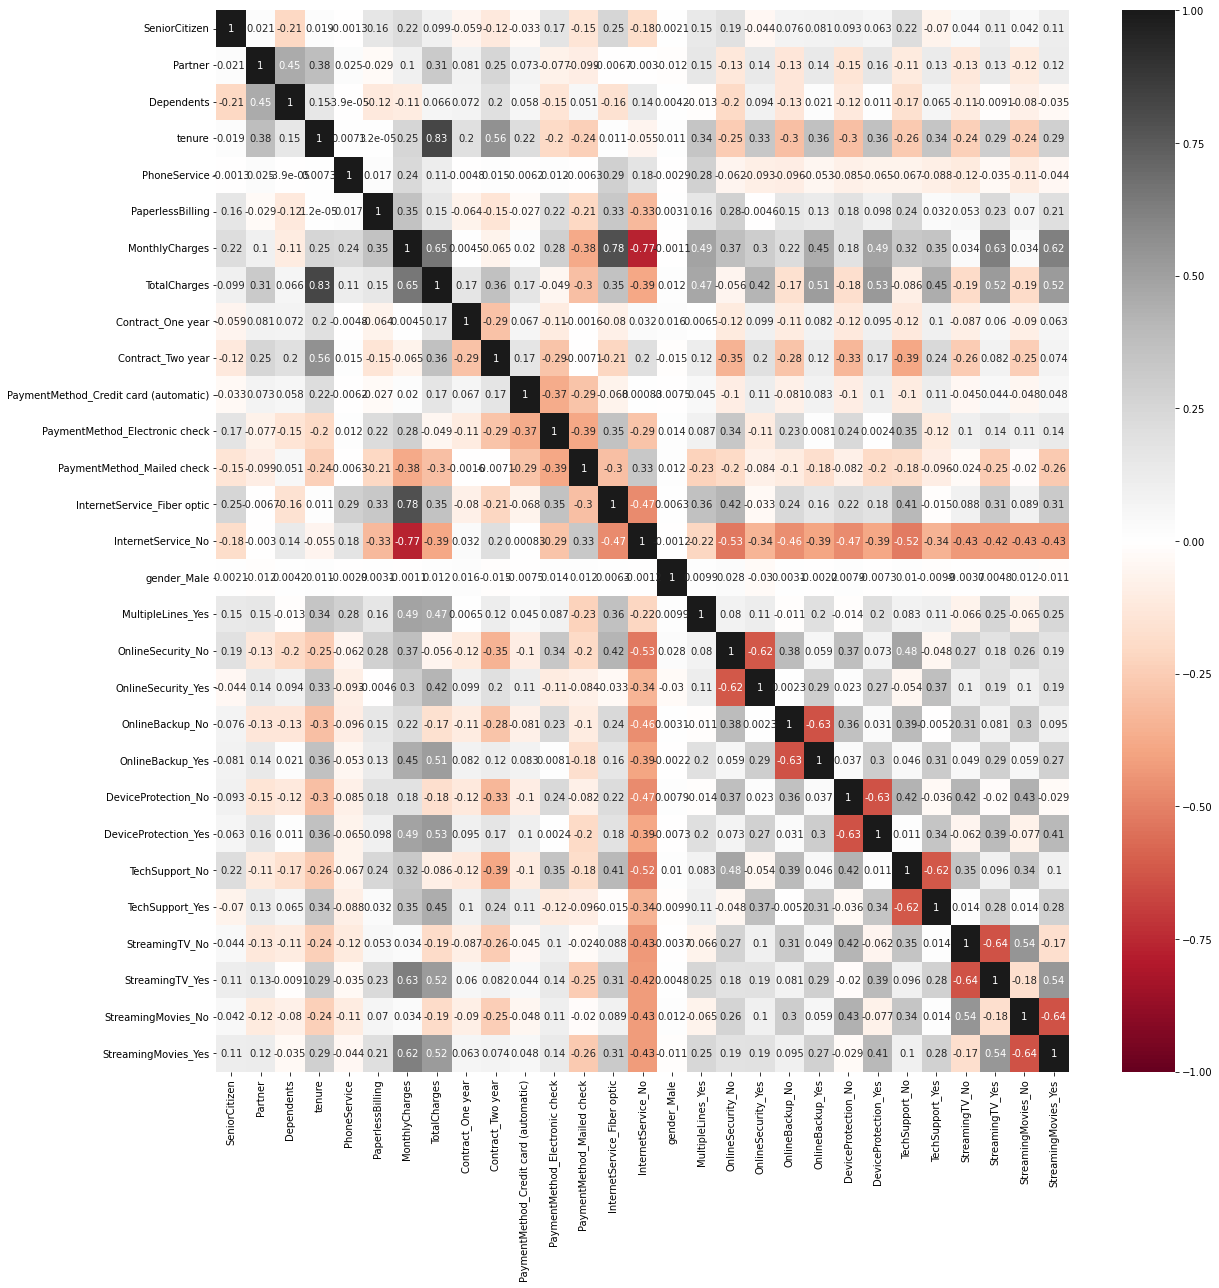

In [68]:
plt.figure(figsize = (18,18))
sns.heatmap(X_train.corr(), annot = True, cmap = "RdGy",  vmin = -1, vmax =1)
plt.tight_layout()
plt.show()

In [69]:
vif(X_train)


,column_name,vif_values
0,StreamingMovies_Yes,inf
1,OnlineSecurity_No,inf
2,StreamingMovies_No,inf
3,StreamingTV_Yes,inf
4,StreamingTV_No,inf
5,TechSupport_Yes,inf
6,TechSupport_No,inf
7,DeviceProtection_Yes,inf
8,DeviceProtection_No,inf
9,OnlineBackup_Yes,inf


In [70]:
drop_cols = ["OnlineSecurity_No", "StreamingMovies_No", "StreamingTV_No", "TechSupport_No", "DeviceProtection_No", "OnlineBackup_No"]

X_train.drop(drop_cols, axis = 1, inplace = True)
X_test.drop(drop_cols, axis = 1, inplace = True)

In [71]:
X_train.shape

(4930, 23)

In [72]:
X_test.shape

(2113, 23)

In [73]:
vif(X_train)

,column_name,vif_values
0,MonthlyCharges,17.837371
1,TotalCharges,10.795379
2,PhoneService,10.623194
3,InternetService_Fiber optic,7.592658
4,tenure,7.389521
5,InternetService_No,7.204493
6,Contract_Two year,3.467440
7,StreamingTV_Yes,3.082628
8,StreamingMovies_Yes,3.009499
9,PaymentMethod_Electronic check,2.990628


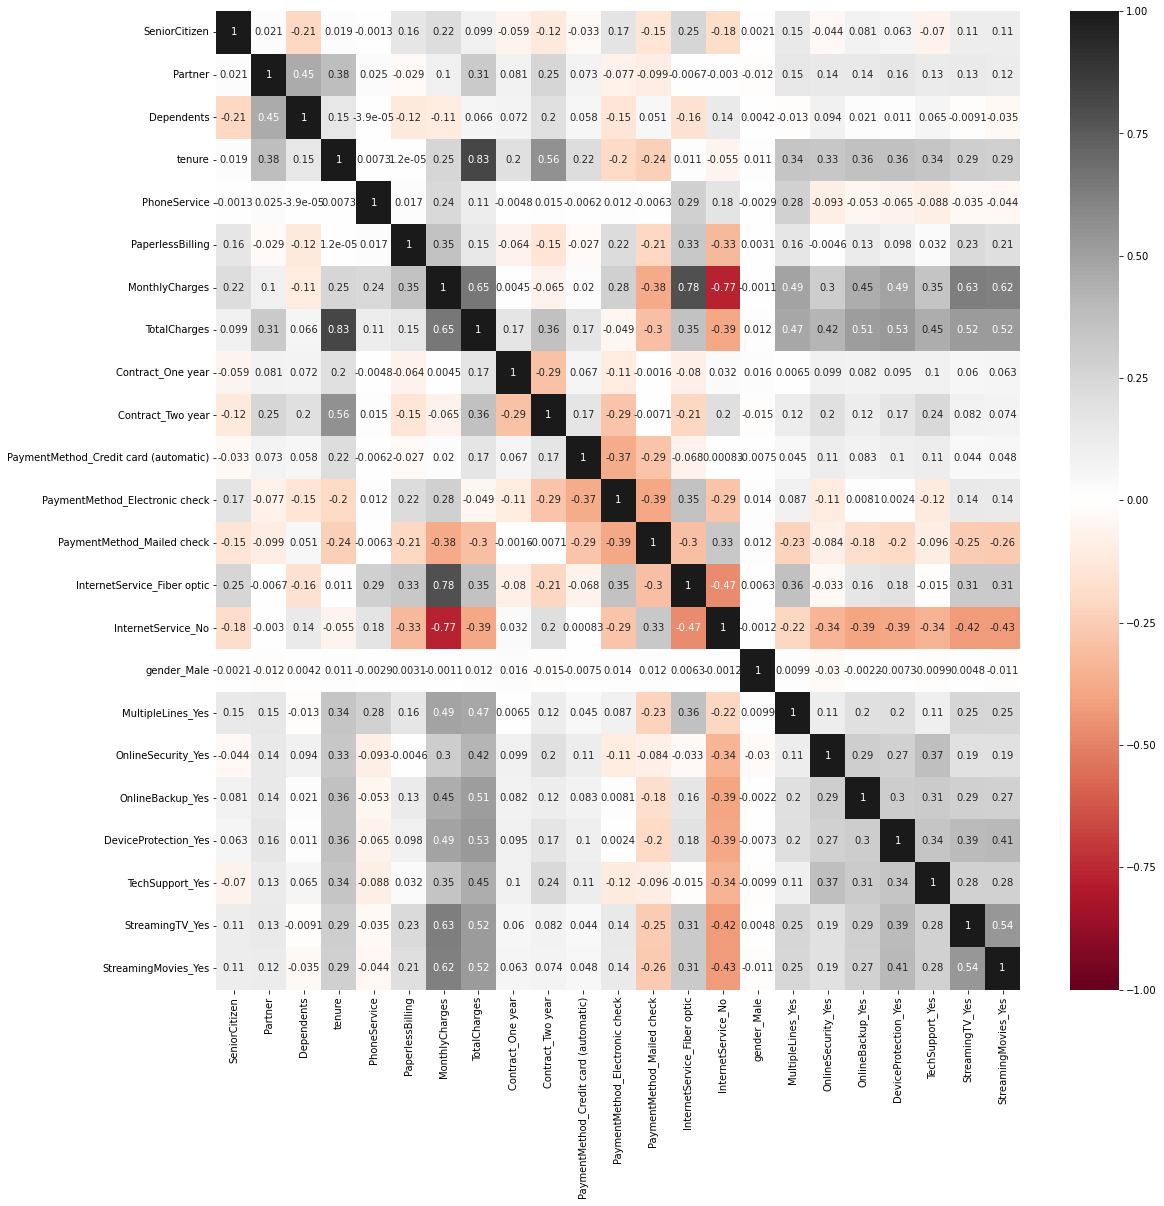

In [74]:
plt.figure(figsize = (18,18))
sns.heatmap(X_train.corr(), annot = True, cmap = "RdGy",  vmin = -1, vmax =1)
plt.show()

# Model 1

In [75]:
X_train1 = sm.add_constant(X_train)

glm1 = sm.GLM(y_train, X_train1, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT

glm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sat, 19 Nov 2022   Deviance:                       4016.1
Time:                        18:01:02   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9889      1.532     -1.952      0.051      -5.991       0.013
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                              0.6103      0.190      3.215      0.001       0.238       0.982
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

In [76]:
# There are mmany columns which are having p-values and we can't just remove the vif completely based on it.
# Because sometimes what happen is due to multicollinearity, some columns become insignificant.
# Hence it is better to check the vif first.

In [77]:
vif(X_train1.drop("const", axis = 1))

,column_name,vif_values
0,MonthlyCharges,17.837371
1,TotalCharges,10.795379
2,PhoneService,10.623194
3,InternetService_Fiber optic,7.592658
4,tenure,7.389521
5,InternetService_No,7.204493
6,Contract_Two year,3.467440
7,StreamingTV_Yes,3.082628
8,StreamingMovies_Yes,3.009499
9,PaymentMethod_Electronic check,2.990628


In [78]:
# CLEARLY THERE IS PRESENCE OF MULTICOLLINEARITY IN THE MODEL.

# Model 2

In [79]:
# LET'S FILTER THOSE COLUMNS USING rfe and create new model from the columns rfe supports.

In [80]:
GLM = LogisticRegression()


rfe = RFE(estimator=GLM, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 2),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('gender_Male', False, 7),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3)]

In [82]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'MonthlyCharges',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [83]:
X_train2 = X_train1[ ["const"] + list(X_train.columns[rfe.support_])]

glm2 = sm.GLM(y_train, X_train2, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT

glm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.5
Date:                Sat, 19 Nov 2022   Deviance:                       4027.0
Time:                        18:01:03   Pearson chi2:                 5.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2869
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0907      0.170     -6.405      0.000      -1.424      -0.757
SeniorCitizen                      0.3323      0.100      3.307      0.001       0.135       0.529
tenure                            -1.3766      0.174     -7.919      0.000      -1.717      -1.036
PhoneService                      -0.6310      0.158     -3.989      0.000      -0.941      -0.321
PaperlessBilling                   0.3610      0.090      4.020      0.000       0.185       0.537
TotalCharges                       0.6560      0.182      3.604      0.000       0.299       1.013
Contract_One year                 -0.6847      0.128     -5.335      0.000      -0.936      -0.433
Contract_Two year                 -1.3542      0.206     -6.564      0.000      -1.759      -0.950
PaymentMethod_Electronic check     0.3638      0.083      4.365      0.000       0.200       0.527
InternetService_Fiber optic        0.7711      0.119      6.495      0.000       0.538       1.004
InternetService_No                -0.9344      0.164     -5.714      0.000      -1.255      -0.614
MultipleLines_Yes                  0.3001      0.096      3.130      0.002       0.112       0.488
OnlineSecurity_Yes                -0.3070      0.102     -3.018      0.003      -0.506      -0.108
OnlineBackup_Yes                  -0.2801      0.093     -3.015      0.003      -0.462      -0.098
TechSupport_Yes                   -0.5067      0.104     -4.877      0.000      -0.710      -0.303
StreamingTV_Yes                    0.2265      0.095      2.386      0.017       0.040       0.412
==================================================================================================
"""

In [84]:
vif(X_train2.drop("const", axis = 1))

,column_name,vif_values
0,PhoneService,9.142564
1,TotalCharges,7.618718
2,tenure,6.468735
3,InternetService_Fiber optic,4.074094
4,InternetService_No,3.320486
5,Contract_Two year,3.235489
6,PaperlessBilling,2.752346
7,MultipleLines_Yes,2.516469
8,StreamingTV_Yes,2.426745
9,OnlineBackup_Yes,2.084322


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

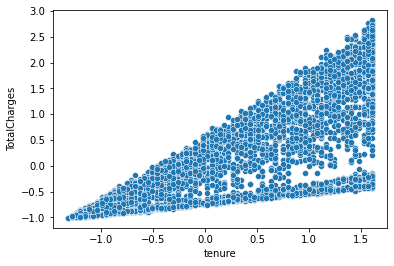

In [85]:
sns.scatterplot(X_train2["tenure"], X_train["TotalCharges"])

In [86]:
X_train2[ ["tenure", "TotalCharges"]].corr()

,tenure,TotalCharges
tenure,1.000000,0.825344
TotalCharges,0.825344,1.000000


In [87]:
### Clearly there is high correlation, lets drop it first and see the p values and vif again.

# Model 3

In [88]:
X_train3 = X_train2.drop("TotalCharges", axis = 1)

glm3 = sm.GLM(y_train, X_train3, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT

glm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.3
Date:                Sat, 19 Nov 2022   Deviance:                       4040.6
Time:                        18:01:03   Pearson chi2:                 5.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2850
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2823      0.160     -8.029      0.000      -1.595      -0.969
SeniorCitizen                      0.3383      0.101      3.353      0.001       0.141       0.536
tenure                            -0.8103      0.066    -12.245      0.000      -0.940      -0.681
PhoneService                      -0.5134      0.152     -3.378      0.001      -0.811      -0.216
PaperlessBilling                   0.3548      0.090      3.962      0.000       0.179       0.530
Contract_One year                 -0.6732      0.127     -5.287      0.000      -0.923      -0.424
Contract_Two year                 -1.3179      0.204     -6.458      0.000      -1.718      -0.918
PaymentMethod_Electronic check     0.3569      0.084      4.273      0.000       0.193       0.521
InternetService_Fiber optic        0.9289      0.110      8.461      0.000       0.714       1.144
InternetService_No                -0.9682      0.163     -5.944      0.000      -1.288      -0.649
MultipleLines_Yes                  0.3515      0.095      3.719      0.000       0.166       0.537
OnlineSecurity_Yes                -0.2650      0.101     -2.619      0.009      -0.463      -0.067
OnlineBackup_Yes                  -0.2250      0.092     -2.455      0.014      -0.405      -0.045
TechSupport_Yes                   -0.4547      0.103     -4.414      0.000      -0.657      -0.253
StreamingTV_Yes                    0.3320      0.090      3.677      0.000       0.155       0.509
==================================================================================================
"""

In [89]:
# all columns have p vlaue less than zero.

In [90]:
vif(X_train3.drop("const", axis =1))

,column_name,vif_values
0,PhoneService,9.036466
1,InternetService_Fiber optic,3.521286
2,Contract_Two year,3.153641
3,InternetService_No,3.054249
4,PaperlessBilling,2.697877
5,MultipleLines_Yes,2.455502
6,StreamingTV_Yes,2.249978
7,tenure,2.212837
8,OnlineBackup_Yes,2.040626
9,TechSupport_Yes,2.034311


# Model 4

In [304]:
X_train4 = X_train3.drop("PhoneService", axis = 1)

glm4 = sm.GLM(y_train, X_train4, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT

glm4 = glm4.fit()

glm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sat, 19 Nov 2022   Deviance:                       4051.9
Time:                        19:52:18   Pearson chi2:                 5.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2833
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6007      0.131    -12.189      0.000      -1.858      -1.343
SeniorCitizen                      0.3595      0.101      3.574      0.000       0.162       0.557
tenure                            -0.7883      0.066    -11.953      0.000      -0.918      -0.659
PaperlessBilling                   0.3558      0.089      3.982      0.000       0.181       0.531
Contract_One year                 -0.6885      0.127     -5.409      0.000      -0.938      -0.439
Contract_Two year                 -1.3302      0.204     -6.510      0.000      -1.731      -0.930
PaymentMethod_Electronic check     0.3670      0.083      4.406      0.000       0.204       0.530
InternetService_Fiber optic        0.7660      0.097      7.892      0.000       0.576       0.956
InternetService_No                -1.1347      0.154     -7.359      0.000      -1.437      -0.832
MultipleLines_Yes                  0.2858      0.092      3.108      0.002       0.106       0.466
OnlineSecurity_Yes                -0.2838      0.101     -2.813      0.005      -0.481      -0.086
OnlineBackup_Yes                  -0.2225      0.092     -2.430      0.015      -0.402      -0.043
TechSupport_Yes                   -0.4737      0.103     -4.612      0.000      -0.675      -0.272
StreamingTV_Yes                    0.3479      0.090      3.861      0.000       0.171       0.524
==================================================================================================
"""

In [92]:
vif(X_train4.drop("const", axis =1))

,column_name,vif_values
0,Contract_Two year,2.979369
1,InternetService_Fiber optic,2.739231
2,PaperlessBilling,2.546017
3,StreamingTV_Yes,2.242918
4,MultipleLines_Yes,2.241041
5,OnlineBackup_Yes,1.982176
6,TechSupport_Yes,1.957523
7,InternetService_No,1.915312
8,tenure,1.901628
9,PaymentMethod_Electronic check,1.833549


In [93]:
# vif and p-values are good.

# Train Model Evaluation

# What we need to find
- Train
    - Prediction df [ actual, prob, predicted]
    - Confusion Matrix
    - Accuracy
    - Senstivity(True Positivity Rate)
    - False Positive Rate(1-Speficity)
    - Speficity
    - ROC curve
    - Pdf curve
    - Finding optimal Cut-off point
    - Recall
    - Precision
    - Recall-Precision Trade Off
    - KS Statistics
    - F1 Score

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [95]:
# Getting the predicted dataframe

def predict_df(X_train, y_train, cut_off_rate, model):
    
    train_prob      = model.predict(X_train)
    train_pred      = train_prob.apply( lambda  x: 1 if x>cut_off_rate else 0)
    pred_df         = pd.concat([y_train, train_prob, train_pred], axis  =1)
    pred_df.columns = ["Actual", "Probability", "Predict"]
    
    return pred_df

In [96]:
# Model scores

def model_evaluation(actual, predict, name ="train"):
    
    confusion   = confusion_matrix(actual,predict)

    TP          = confusion[1,1] # true positive 
    TN          = confusion[0,0] # true negatives
    FP          = confusion[0,1] # false positives
    FN          = confusion[1,0] # false negatives

    Accuracy    = np.round( accuracy_score(actual,predict)*100, 3)
    Senstivity  = np.round( TP/( FN + TP)*100, 3)
    Specificity = np.round( TN/( FP + TN)*100, 3)
    FPR         = np.round( FP/( FP + TN)*100, 3)
    FNR         = np.round( FN/( FN + TP)*100, 3)
    Recall      = Senstivity
    Precision   = np.round( TP/(TP + FP)*100, 3)
    
    df_eval = pd.DataFrame({"Accuracy": Accuracy, 
                            "Senstivity": Senstivity, 
                            "Specificity" : Specificity, 
                            "FPR": FPR, 
                            "FNR": FNR, 
                            "Recall": Recall, 
                            "Precision": Precision}, index=[0])
    df_eval = df_eval.T
    df_eval.columns = [name]
    
    return df_eval
    

In [97]:
def draw_roc( actual, probability):
    
    TPR, FPR, THRESHOLDS = roc_curve(actual, probability, drop_intermediate = False)
    AUC                  = roc_auc_score( actual, probability )
    
    plt.figure(figsize = (8,6))
    plt.plot(TPR,FPR, label = "ROC CURVE (AUC = %0.2f" %AUC)
    plt.plot([0,1], [0,1],  "k--")
    plt.xlabel('False Positive Rate', fontsize = 14)
    plt.ylabel('True Positive Rate', fontsize = 14)
    plt.title('Receiver Operating Characteristic Curve', fontsize = 16)
    plt.legend( loc="lower right")
    plt.rcParams.update({'legend.fontsize': 14})
    plt.grid(linestyle='--', linewidth=.5)
    plt.yticks(weight = "medium")
    plt.xticks(weight = "medium")
    plt.show()

In [98]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

def optimal_cut_off(pred_df):

    cut_off = [ float(i)/10 for i in range(10)]
    
    for rate in cut_off:
        pred_df[rate] = pred_df["Probability"].apply(lambda x: 1 if x > rate else 0)
    
    optimal_df = pd.DataFrame(columns = ['Probability','Accuracy','Senstivity','Specificity']) 
    for rate in cut_off:
        confusion   = confusion_matrix(pred_df["Actual"],pred_df[rate])
        accuracy    = accuracy_score(pred_df["Actual"],pred_df[rate])
        senstivity  = confusion[1,1]/( confusion[1,0] + confusion[1,1])
        specificity = confusion[0,0]/( confusion[0,1] + confusion[0,0])
        optimal_df.loc[rate] = [ rate ,accuracy,senstivity,specificity]
        
    for i in optimal_df.index:
        a = optimal_df.loc[i]["Accuracy"]
        b = optimal_df.loc[i]["Senstivity"]
        c = optimal_df.loc[i]["Specificity"]
    
        if abs(b-a) + abs(c-a) + abs(c-b) < 0.1:
            final_cut_off = i
            final_precentage = a
    
    
    
    plt.figure(figsize = (8,6))
    plt.plot(optimal_df["Probability"], optimal_df['Accuracy'], label = "Accuracy" )
    plt.plot(optimal_df["Probability"], optimal_df['Senstivity'], label = "Senstivity" )
    plt.plot(optimal_df["Probability"], optimal_df['Specificity'], label = "Specificity" )
    plt.scatter(x = [final_cut_off], y = [final_precentage], color =  "black", s =100, label = None )
    plt.xlabel('Cut-off Rate', fontsize = 12)
    plt.ylabel('Percentage %', fontsize = 12)
    plt.title('Optimal Cutoff Point Curves', fontsize = 16)
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.legend()
    plt.grid(linestyle='--', linewidth=.5)
    plt.show()
    
    print(optimal_df)

In [99]:
def plot_pdf(pred_df, name_a = "good", name_b = "bad"):
    plt.figure(figsize= (8,6))
    sns.kdeplot(pred_df["Probability"] , fill= True, color = "lime")
    sns.kdeplot(1- pred_df["Probability"] , fill= True, color = "brown")
    plt.title("Probability Distribution", fontsize=14)
    plt.ylabel('Counts', fontsize=12)
    plt.legend([name_a, name_b], loc = "best")
    plt.grid(linestyle='--', linewidth=.5)
    plt.show()

In [100]:
def precision_recall_tradeoff(actual, probability):
    p, r, thresholds = precision_recall_curve(actual, probability)
    plt.figure(figsize= (8,6))
    sns.lineplot(thresholds, p[:-1], color = "blue", label = "Precision" )
    sns.lineplot(thresholds, r[:-1], color = "red", label = "Recall" )
    plt.xlabel('Probability', fontsize = 12)
    plt.ylabel('Percentage %', fontsize = 12)
    plt.title('Precision and Recall Trade-Off', fontsize = 16)
    plt.legend()
    plt.grid(linestyle='--', linewidth=.5)
    plt.show()

In [101]:
def ks_plot(pred_df):
    
    from scipy.stats import ks_2samp
    
    # Class sepearate
    class0 = pred_df[pred_df['Actual'] == 0].sort_values('Probability')
    class1 = pred_df[pred_df['Actual'] == 1].sort_values('Probability')
    
    # Find CDFs for both class
    prob0  = class0['Probability'].values
    length = len(prob0)
    cdf0   = [sum(prob0[0:x:1]) for x in range(0, length+1)][1:]
    
    prob1  = class1['Probability'].values
    length = len(prob1)
    cdf1   = [sum(prob1[0:x:1]) for x in range(0, length+1)][1:]
    
    # Find KS statistics
    ks = ks_2samp(class0['Probability'], class1['Probability'])
    
    # Plot CDFs for both class
    plt.figure(figsize = (8, 6))
    plt.title(f"KS: {ks.statistic:.4f}, (P-value: {ks.pvalue:.3e})", fontsize = 15)
    sns.lineplot(x = prob0, y = cdf0, color = 'b', linewidth = 3, label = "Class-0")
    sns.lineplot(x = prob1, y = cdf1, color = 'g', linewidth = 3, label = "Class-1")
    plt.xlabel('Probability', fontsize = 12)
    plt.ylabel('Commulative Sum', fontsize = 12)
    plt.legend()
    plt.show()
    
    return ks.statistic

In [102]:
def iv_woe(data, target, bins=10):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for var in cols[~cols.isin([target])]:
        
        #For continous variable
        if (data[var].dtype.kind in 'if') and (len(np.unique(data[var]))>10):
            
            binned_x     = pd.qcut(data[var], bins,  duplicates='drop')
            d0           = pd.DataFrame({'x': binned_x, 'y': data[target]})  
        
        else:
            d0           = pd.DataFrame({'x': data[var], 'y': data[target]})
 
        # Calculate the number of events in each group (bin)
        d                = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        
        # renaming columns
        d.columns        = ['Cutoff', 'N', 'Events']
        
        d['Events']      = d['Events']
        d['%Events']     = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events']  = d['N'] - d['Events']
        d['%Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE 
        d['WoE']         = np.log(d['%Events']/d['%Non-Events'])
        d['IV']          = d['WoE'] * (d['%Events'] - d['%Non-Events'])
        
        d.insert(loc=0, column='Variable', value=var)
        
        temp  = pd.DataFrame({"Variable" : [var], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        
        newDF = pd.concat([newDF,temp], axis=0)
        woeDF = pd.concat([woeDF,d], axis=0)

    return newDF

# Predicted Data Frame

In [103]:
pred_df = predict_df(X_train4, y_train, cut_off_rate = 0.5, model = glm4)
pred_df.head()

,Actual,Probability,Predict
877,0,0.035796,0
5792,1,0.421518,0
5334,1,0.083011,0
878,0,0.036358,0
6578,0,0.115060,0


# Model Evaluation

In [104]:
model_evaluation(pred_df["Actual"], pred_df["Predict"])

,train
Accuracy,81.034000
Senstivity,56.025000
Specificity,90.019000
FPR,9.981000
FNR,43.975000
Recall,56.025000
Precision,66.850000


# Confusion Matrix

In [105]:
confusion   = confusion_matrix(pred_df["Actual"], pred_df["Predict"])
confusion

array([[3265,  362],
       [ 573,  730]], dtype=int64)

# ROC - Curve

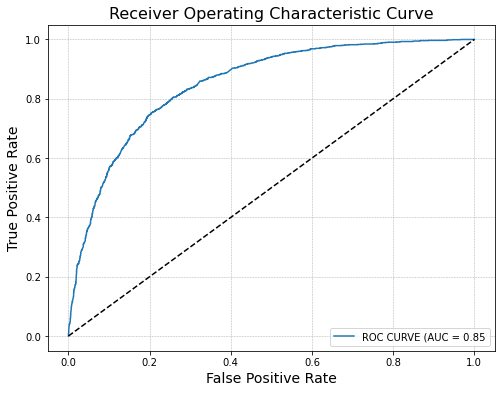

In [106]:
draw_roc(pred_df["Actual"], pred_df["Probability"])

# Optimal cut-off

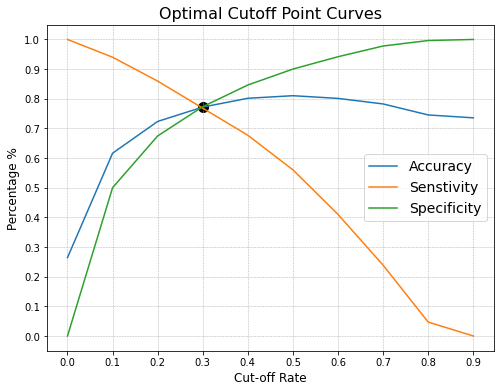

          Probability  Accuracy  Senstivity  Specificity
0.000000     0.000000  0.264300    1.000000     0.000000
0.100000     0.100000  0.616430    0.940138     0.500138
0.200000     0.200000  0.723529    0.859555     0.674662
0.300000     0.300000  0.772008    0.768227     0.773366
0.400000     0.400000  0.801623    0.676899     0.846430
0.500000     0.500000  0.810345    0.560246     0.900193
0.600000     0.600000  0.801217    0.409823     0.941825
0.700000     0.700000  0.782556    0.238680     0.977943
0.800000     0.800000  0.745436    0.046815     0.996416
0.900000     0.900000  0.735700    0.000000     1.000000


In [107]:
optimal_cut_off(pred_df)

# Pdf class plot

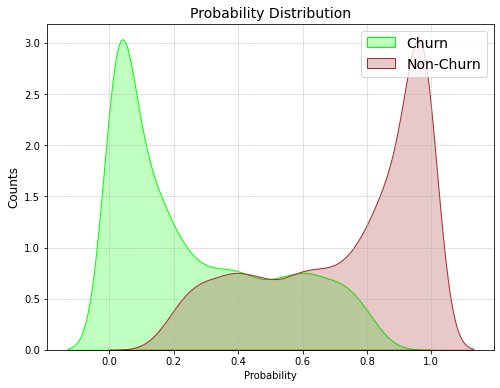

In [108]:
plot_pdf(pred_df, name_a = "Churn", name_b = "Non-Churn")

In [109]:
# big area is under the common shaded region it should be as less possible

# Precision-Recall Trade Off

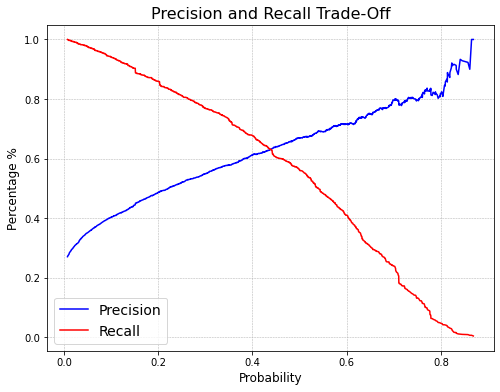

In [110]:
precision_recall_tradeoff(pred_df["Actual"], pred_df["Probability"])


<h2>KS stataics:</h2>

- Kolmogorov smirnov test checks whether model is able to separate events and non-events. 
- It does this by simply finding the distance between the cdfs of two separate events.
- Ideally, it should be in first three deciles. 
- Normal Score lies between 40 and 70. 
- There should not be more than 10 points difference between training and validation KS score. 
- Score above 70 is susceptible and might be overfitting so rigorous validation is required.

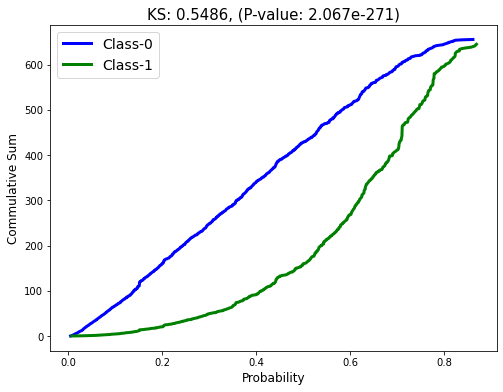

0.5485768986375527

In [111]:
ks_plot(pred_df)

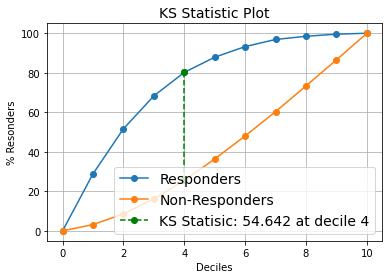

In [112]:
plot_ks_statistic(pred_df["Actual"],pred_df["Probability"])

# Gain plot

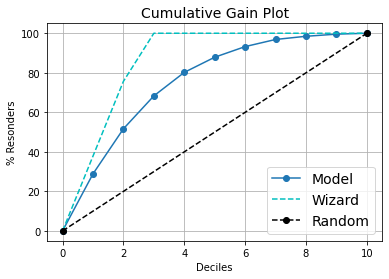

In [113]:

plot_cumulative_gain(pred_df["Actual"],pred_df["Probability"]  )


# Lift Plot

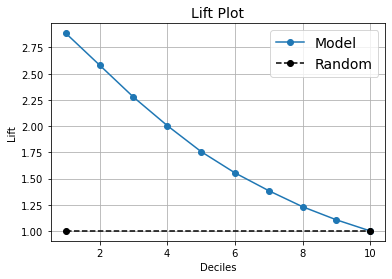

In [114]:
dd = plot_lift(pred_df["Actual"],pred_df["Probability"] )

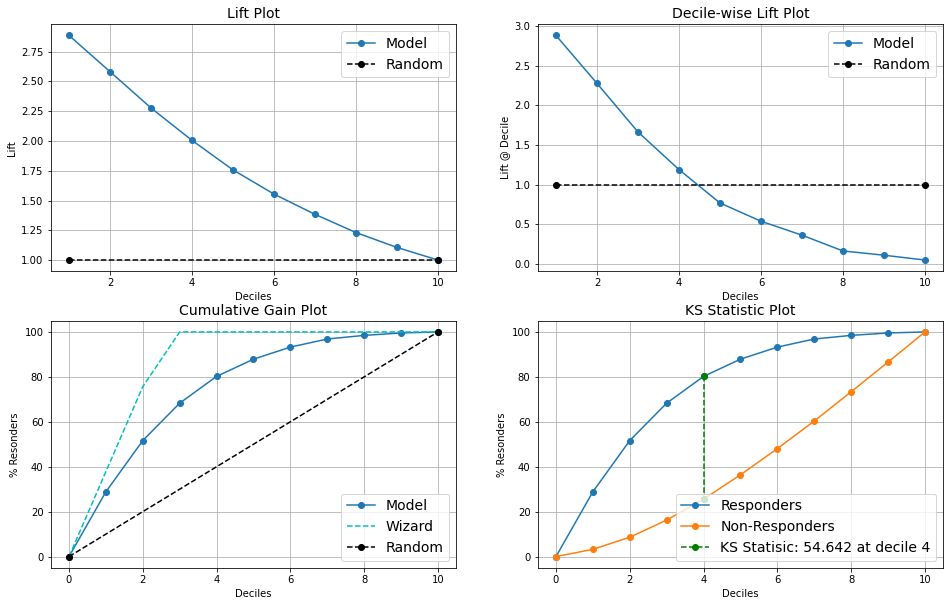

In [115]:
dd = report(pred_df["Actual"],pred_df["Probability"], labels = False)

# Check Information Value of you model variables

In [116]:
cols = list(X_train4.drop("const", axis=1).columns) + ["Churn"]
data = df_train[cols]

# Test Prediction and Evaluation

In [119]:
X_test4 = sm.add_constant(X_test)[X_train4.columns]

X_test4.shape

(2113, 14)

In [120]:
pred_train_df = predict_df(X_train4,y_train,cut_off_rate =  0.3, model =  glm4)
pred_train_df.head()

,Actual,Probability,Predict
877,0,0.035796,0
5792,1,0.421518,1
5334,1,0.083011,0
878,0,0.036358,0
6578,0,0.115060,0


In [121]:
pred_test_df = predict_df(X_test4,y_test,cut_off_rate =  0.3, model =  glm4)
pred_test_df.head()

,Actual,Probability,Predict
4880,0,0.009678,0
1541,0,0.004802,0
1289,0,0.018651,0
5745,0,0.012876,0
4873,0,0.128044,0


In [122]:
test_eval = model_evaluation(pred_test_df["Actual"], pred_test_df["Predict"], name ="Test")
test_eval


,Test
Accuracy,74.018000
Senstivity,75.442000
Specificity,73.497000
FPR,26.503000
FNR,24.558000
Recall,75.442000
Precision,51.016000


In [123]:
train_eval = model_evaluation(pred_train_df["Actual"], pred_train_df["Predict"], name = "Train")
train_eval

,Train
Accuracy,77.201000
Senstivity,76.823000
Specificity,77.337000
FPR,22.663000
FNR,23.177000
Recall,76.823000
Precision,54.909000


In [124]:
final_eval = pd.concat([train_eval, test_eval], axis = 1)
final_eval["diff"] = final_eval["Test"] - final_eval["Train"]
final_eval

,Train,Test,diff
Accuracy,77.201000,74.018000,-3.183000
Senstivity,76.823000,75.442000,-1.381000
Specificity,77.337000,73.497000,-3.840000
FPR,22.663000,26.503000,3.840000
FNR,23.177000,24.558000,1.381000
Recall,76.823000,75.442000,-1.381000
Precision,54.909000,51.016000,-3.893000


# Gradient Descent
    - logistic regression
    - sgdclassifier
    - gd class using sigmoid 
    - gd class using softmax

### LogisticRegression

In [172]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty= 'none',solver= "sag", max_iter=10000, tol=0.001)
lor.fit(X_train4, y_train)

LogisticRegression(max_iter=10000, penalty='none', solver='sag', tol=0.001)

In [173]:
train_pred = lor.predict(X_train4, )

In [174]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3627
           1       0.67      0.56      0.61      1303

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.81      4930



### SGDClassifier

In [279]:
from sklearn.linear_model import SGDClassifier

In [285]:
sgd = SGDClassifier(penalty='l1', alpha=0.00001, l1_ratio=0.10, max_iter=10000, learning_rate = "optimal")
sgd.fit(X_train4, y_train)

SGDClassifier(alpha=1e-05, l1_ratio=0.1, max_iter=10000, penalty='l1')

In [286]:
train_pred = sgd.predict(X_train4)

In [287]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3627
           1       0.59      0.65      0.62      1303

    accuracy                           0.79      4930
   macro avg       0.73      0.74      0.73      4930
weighted avg       0.80      0.79      0.79      4930



In [288]:
y_train.value_counts()

0    3627
1    1303
Name: Churn, dtype: int64

In [289]:
pd.Series(train_pred).value_counts()

0    3479
1    1451
dtype: int64

### Gradient descent_sigmoid

In [498]:
class GD_Sigmoid:
    
    def __init__(self, n_iter = 10000, lr = 0.1, cut_off = 0.43):
        self.n_iter = n_iter
        self.lr = lr
        self.weights = None
        self.cut_off = cut_off
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    
    def fit(self, X_train, Y_train):
        
        # adding contsant in X_train
        Y_train          = np.array(Y_train)
        X_train_new      = np.insert(np.array(X_train),0,1,axis=1)
        
        # creating initial weights
        self.weights     = np.ones((X_train_new.shape[1]))
        
        # default predictive value
        y_proba         = self.sigmoid(np.dot(X_train_new,self.weights))    
        
        for i in range(self.n_iter):
            # update weight
            self.weights   = self.weights + self.lr*(np.dot((y_train-y_proba),X_train_new)/X_train.shape[0])
            
            # update y_hat
            y_proba        = self.sigmoid(np.dot(X_train_new,self.weights))
    
        return self.weights[1:], self.weights[0]
    
    def predict(self, X_train):
        X_train_new  = np.insert(np.array(X_train),0,1,axis=1)
        y_proba      = self.sigmoid(np.dot(X_train_new,self.weights))
        y_hat        = np.array([1 if i>self.cut_off else 0 for i in y_proba])
        return y_hat
        

In [499]:
gdc = GD_Sigmoid(n_iter = 10000, lr = 0.1)

coef_, intercept= gdc.fit(X_train4, y_train)

In [500]:
y_pred = gdc.predict(X_train4)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [501]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3627
           1       0.63      0.64      0.63      1303

    accuracy                           0.80      4930
   macro avg       0.75      0.75      0.75      4930
weighted avg       0.81      0.80      0.80      4930



In [502]:
pd.Series(y_pred).value_counts()

0    3596
1    1334
dtype: int64

### Gradient descent_softmax

- <b>Unlike sigmoid, softmax function finds the probability for both the 0 and 1 in binary classification.</b><br>
- <b>For softmax, y_train would depends on number of class. Columns of y_train would be same as the number of class. Each y_train column would talk about each class. </b><br>
- <b>Here Loss function is also different.</b><br>
- <b>The given function will work for both Binary classification and Multiclassification.</b><br>
- <b>However, It is advisable to use softmax in case of Multiclassification only.</b><br>
- <b>Moreover, for multiclassification, In ove vs all, Number of classifier models and number of classes are same. But here in softmax, only one classifier would be used to solve the multi_classification problem.</b><br>
- <b>Here, for each class, there will be different weights.</b><br>
- <b>It performs very badly in imbalanced data.</b><br>

In [621]:
class GD_Softmax:
   
    def __init__(self, lr=0.1, epochs=1000):
        self.lr       = lr
        self.epochs   = epochs
        self.weights  = None
        self.mappings = None
        
    def onehotencoder(self, Y_train):
        rows          = len(Y_train)
        categories    = np.unique(Y_train)

        # Create mappings from categories to numbers 0 to n_categories - 1.
        self.mappings = {}
        for id, category in enumerate(categories):
            self.mappings[category] = id

        # Create one hot encoded array of shape (n_samples, n_categories).
        one_hot_array = np.zeros((rows, len(categories)))
        
        for row, value in enumerate(Y_train):
            one_hot_array[row, self.mappings[value]] = 1

        return one_hot_array
    
    def softmax(self, X_train):
        
        e_x = np.exp(X_train - np.max(X_train, axis=1, keepdims=True)) 

        return e_x / np.sum(e_x, axis=1, keepdims=True)
      
    def get_key(self, val):
        for key, value in self.mappings.items():
            if val == value:
                return key
        return "key doesn't exist"

        
    def fit(self, X_train, Y_train):
        
        Y_train_encoded = self.onehotencoder(Y_train)
        X_train_new     = np.insert(np.array(X_train), 0, 1, axis=1)
    
        num_weights     = X_train_new.shape[1]
        num_class       = len(np.unique(Y_train))
        
        # default weights
        self.weights    = np.ones((num_weights,num_class))
        
        
        for i in range(self.epochs):
            
            # update class probability
            Y_proba_class   = self.softmax(np.dot(X_train_new, self.weights))
            
            # update weight
            self.weights = self.weights + self.lr*(np.dot(X_train_new.T,(Y_proba_class - Y_train_encoded))/X_train_new.shape[0])   
    
        return self.weights[1:], self.weights[0]
    
    
    def predict_proba(self, X_train):
        X_train_new     = np.insert(np.array(X_train), 0, 1, axis=1)
        Y_proba_class   = self.softmax(np.dot(X_train_new, self.weights))
        
        return Y_proba_class
    
    def predict(self, X_train):
        X_train_new     = np.insert(np.array(X_train), 0, 1, axis=1)
        Y_proba_class   = self.softmax(np.dot(X_train_new, self.weights))
        index           = np.argmax(Y_proba_class, axis=1)
        Y_pred          = np.array([self.get_key(i) for i in index])
        return Y_pred
    

In [622]:
gdf = GD_Softmax(epochs = 10000, lr = 0.1)

coef_, intercept= gdf.fit(X_train4, y_train)

In [623]:
y_train_proba = gdf.predict_proba(X_train4)

In [624]:
y_train_pred = gdf.predict(X_train4)

In [625]:
y_train_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)